In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [226]:
df=pd.read_csv(r"D:\project 5\hospital_readmissions (1).csv")
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [227]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

Problem: Predict hospital readmissions within 30 days.
Objective: Build a predictive model for high-risk patients.
Tasks:
Data Preprocessing
Feature Engineering
Model Building
Model Evaluation



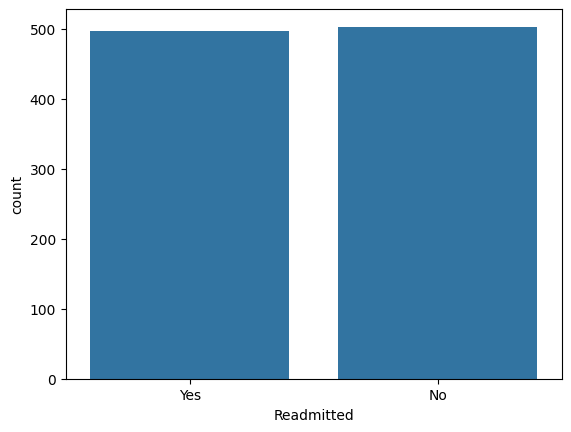

In [228]:
ax=sns.countplot(x='Readmitted',data=df)

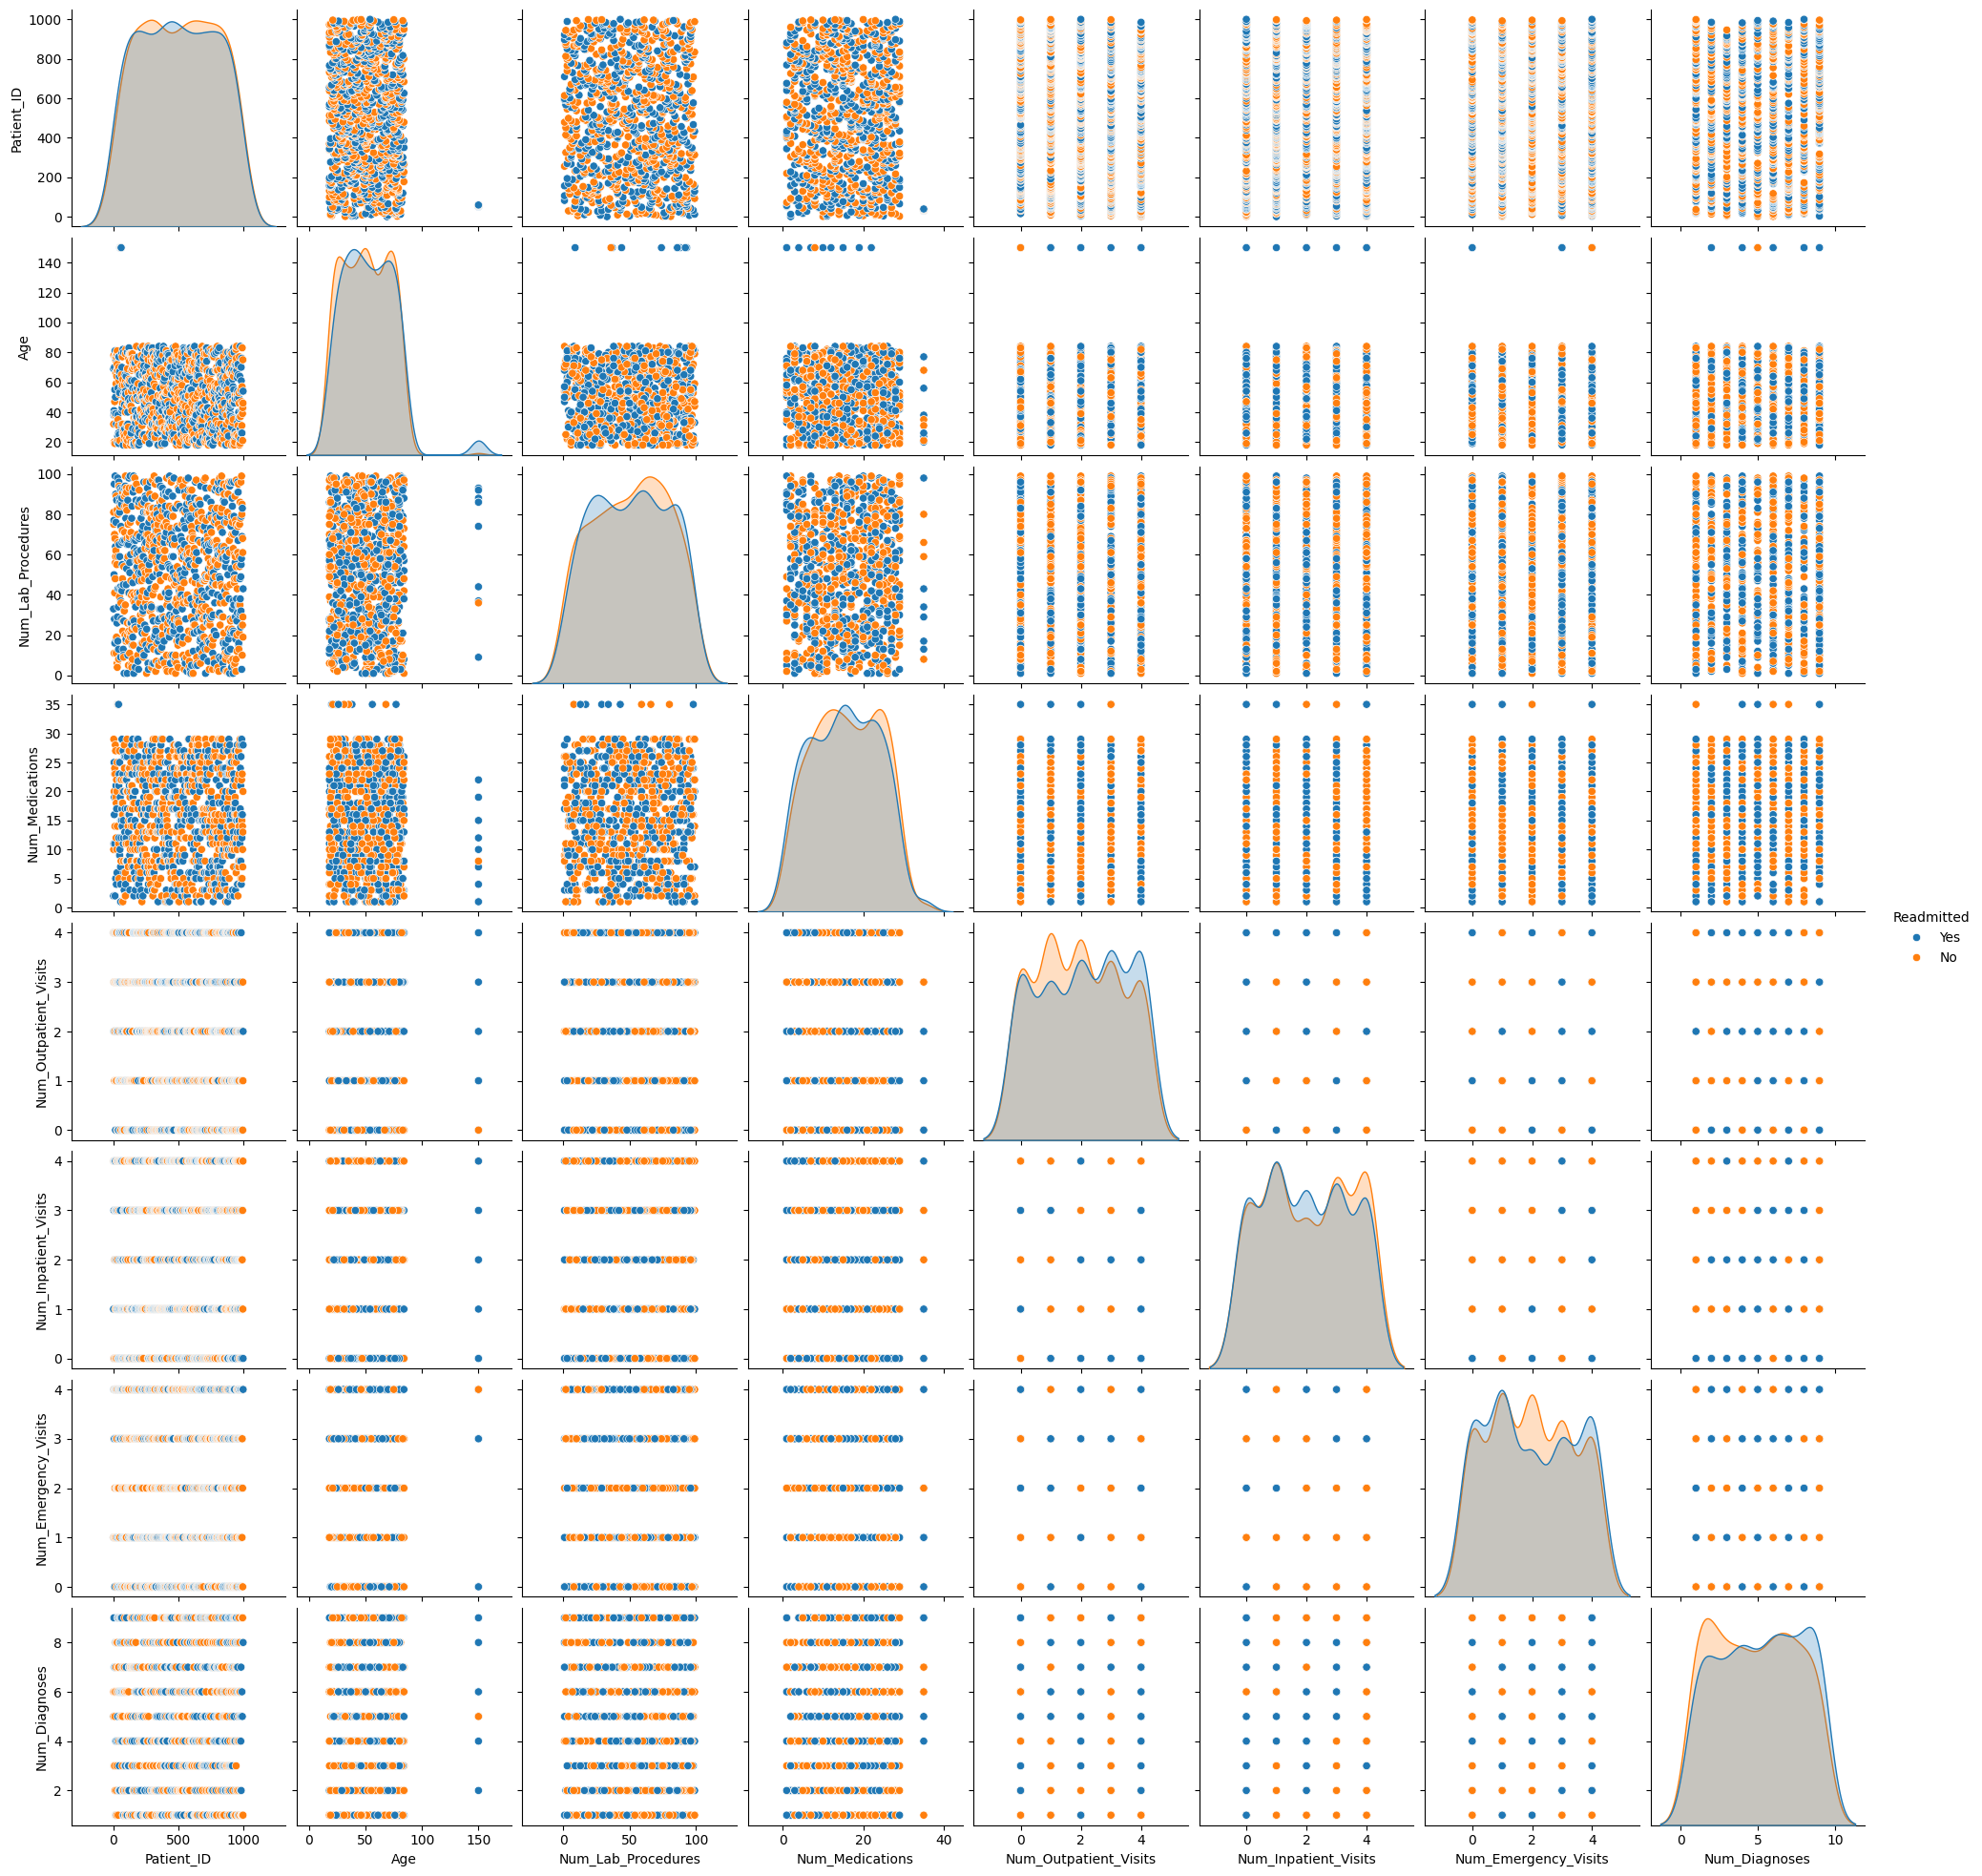

In [284]:
sns.pairplot(df,hue="Readmitted")

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [230]:
df['A1C_Result'].value_counts()

A1C_Result
Abnormal    301
Normal      265
Name: count, dtype: int64

In [231]:
# Calculate the ratio of 'Normal' and 'Abnormal' values
a1c_ratio = df['A1C_Result'].value_counts(normalize=True)

# Fill null values based on the ratio
null_count = df['A1C_Result'].isnull().sum()
null_indices = df[df['A1C_Result'].isnull()].index

fill_values = np.random.choice(a1c_ratio.index, size=null_count, p=a1c_ratio.values)
df.loc[null_indices, 'A1C_Result'] = fill_values


In [232]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             1000 non-null   object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [234]:
df['A1C_Result'].value_counts()

A1C_Result
Abnormal    521
Normal      479
Name: count, dtype: int64

In [235]:
num_cols=df.select_dtypes(include='int64')
cat_cols=df.select_dtypes(include='object')

In [236]:
cols=list(cat_cols.columns)

In [237]:
for i in cols:
    print(df[i].value_counts())
    print("                 ")

Gender
Male      346
Female    337
Other     317
Name: count, dtype: int64
                 
Admission_Type
Elective     345
Emergency    337
Urgent       318
Name: count, dtype: int64
                 
Diagnosis
Diabetes         272
Infection        247
Injury           244
Heart Disease    237
Name: count, dtype: int64
                 
A1C_Result
Abnormal    521
Normal      479
Name: count, dtype: int64
                 
Readmitted
No     503
Yes    497
Name: count, dtype: int64
                 


In [238]:
#calculate the ratio of 'male' and 'female' values
gender_ratio=df['Gender'].replace('Other',np.nan).value_counts(normalize=True)

#replace 'other' values based on the ratio
other_indices=df[df['Gender']=='Other'].index

replace_values=np.random.choice(gender_ratio.index,size=len(other_indices),p=gender_ratio.values)
df.loc[other_indices,'Gender']=replace_values

In [239]:
num_cols=df.select_dtypes(include='int64')
cat_cols=df.select_dtypes(include='object')
cols=list(cat_cols.columns)
for i in cols:
    print(df[i].value_counts())
    print("                 ")

Gender
Male      502
Female    498
Name: count, dtype: int64
                 
Admission_Type
Elective     345
Emergency    337
Urgent       318
Name: count, dtype: int64
                 
Diagnosis
Diabetes         272
Infection        247
Injury           244
Heart Disease    237
Name: count, dtype: int64
                 
A1C_Result
Abnormal    521
Normal      479
Name: count, dtype: int64
                 
Readmitted
No     503
Yes    497
Name: count, dtype: int64
                 


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             1000 non-null   object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [241]:
df.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,51.665000,50.836000,15.661000,2.016000,2.019000,1.956000,5.011000
std,288.819436,21.989459,28.075137,8.230177,1.399894,1.416561,1.409983,2.664203
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,500.500000,50.500000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000
75%,750.250000,69.000000,75.000000,23.000000,3.000000,3.000000,3.000000,7.000000
max,1000.000000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [242]:
one_hot_cols=pd.get_dummies(cat_cols)

In [243]:
one_hot_cols.columns

Index(['Gender_Female', 'Gender_Male', 'Admission_Type_Elective',
       'Admission_Type_Emergency', 'Admission_Type_Urgent',
       'Diagnosis_Diabetes', 'Diagnosis_Heart Disease', 'Diagnosis_Infection',
       'Diagnosis_Injury', 'A1C_Result_Abnormal', 'A1C_Result_Normal',
       'Readmitted_No', 'Readmitted_Yes'],
      dtype='object')

In [244]:
one_hot_cols.shape

(1000, 13)

In [245]:
num_cols.shape

(1000, 8)

In [246]:
final_df=pd.concat([one_hot_cols,num_cols],axis=1)

In [247]:
final_df.head()

,Gender_Female,Gender_Male,Admission_Type_Elective,Admission_Type_Emergency,Admission_Type_Urgent,Diagnosis_Diabetes,Diagnosis_Heart Disease,Diagnosis_Infection,Diagnosis_Injury,A1C_Result_Abnormal,...,Readmitted_No,Readmitted_Yes,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
0,False,True,False,True,False,False,True,False,False,False,...,False,True,1,69,33,2,4,1,1,5
1,True,False,False,False,True,True,False,False,False,False,...,True,False,2,32,81,10,4,4,1,6
2,True,False,False,False,True,False,True,False,False,False,...,True,False,3,78,75,29,4,0,3,5
3,False,True,True,False,False,True,False,False,False,False,...,False,True,4,38,77,11,2,3,4,9
4,True,False,False,False,True,True,False,False,False,False,...,False,True,5,41,50,25,3,4,1,3


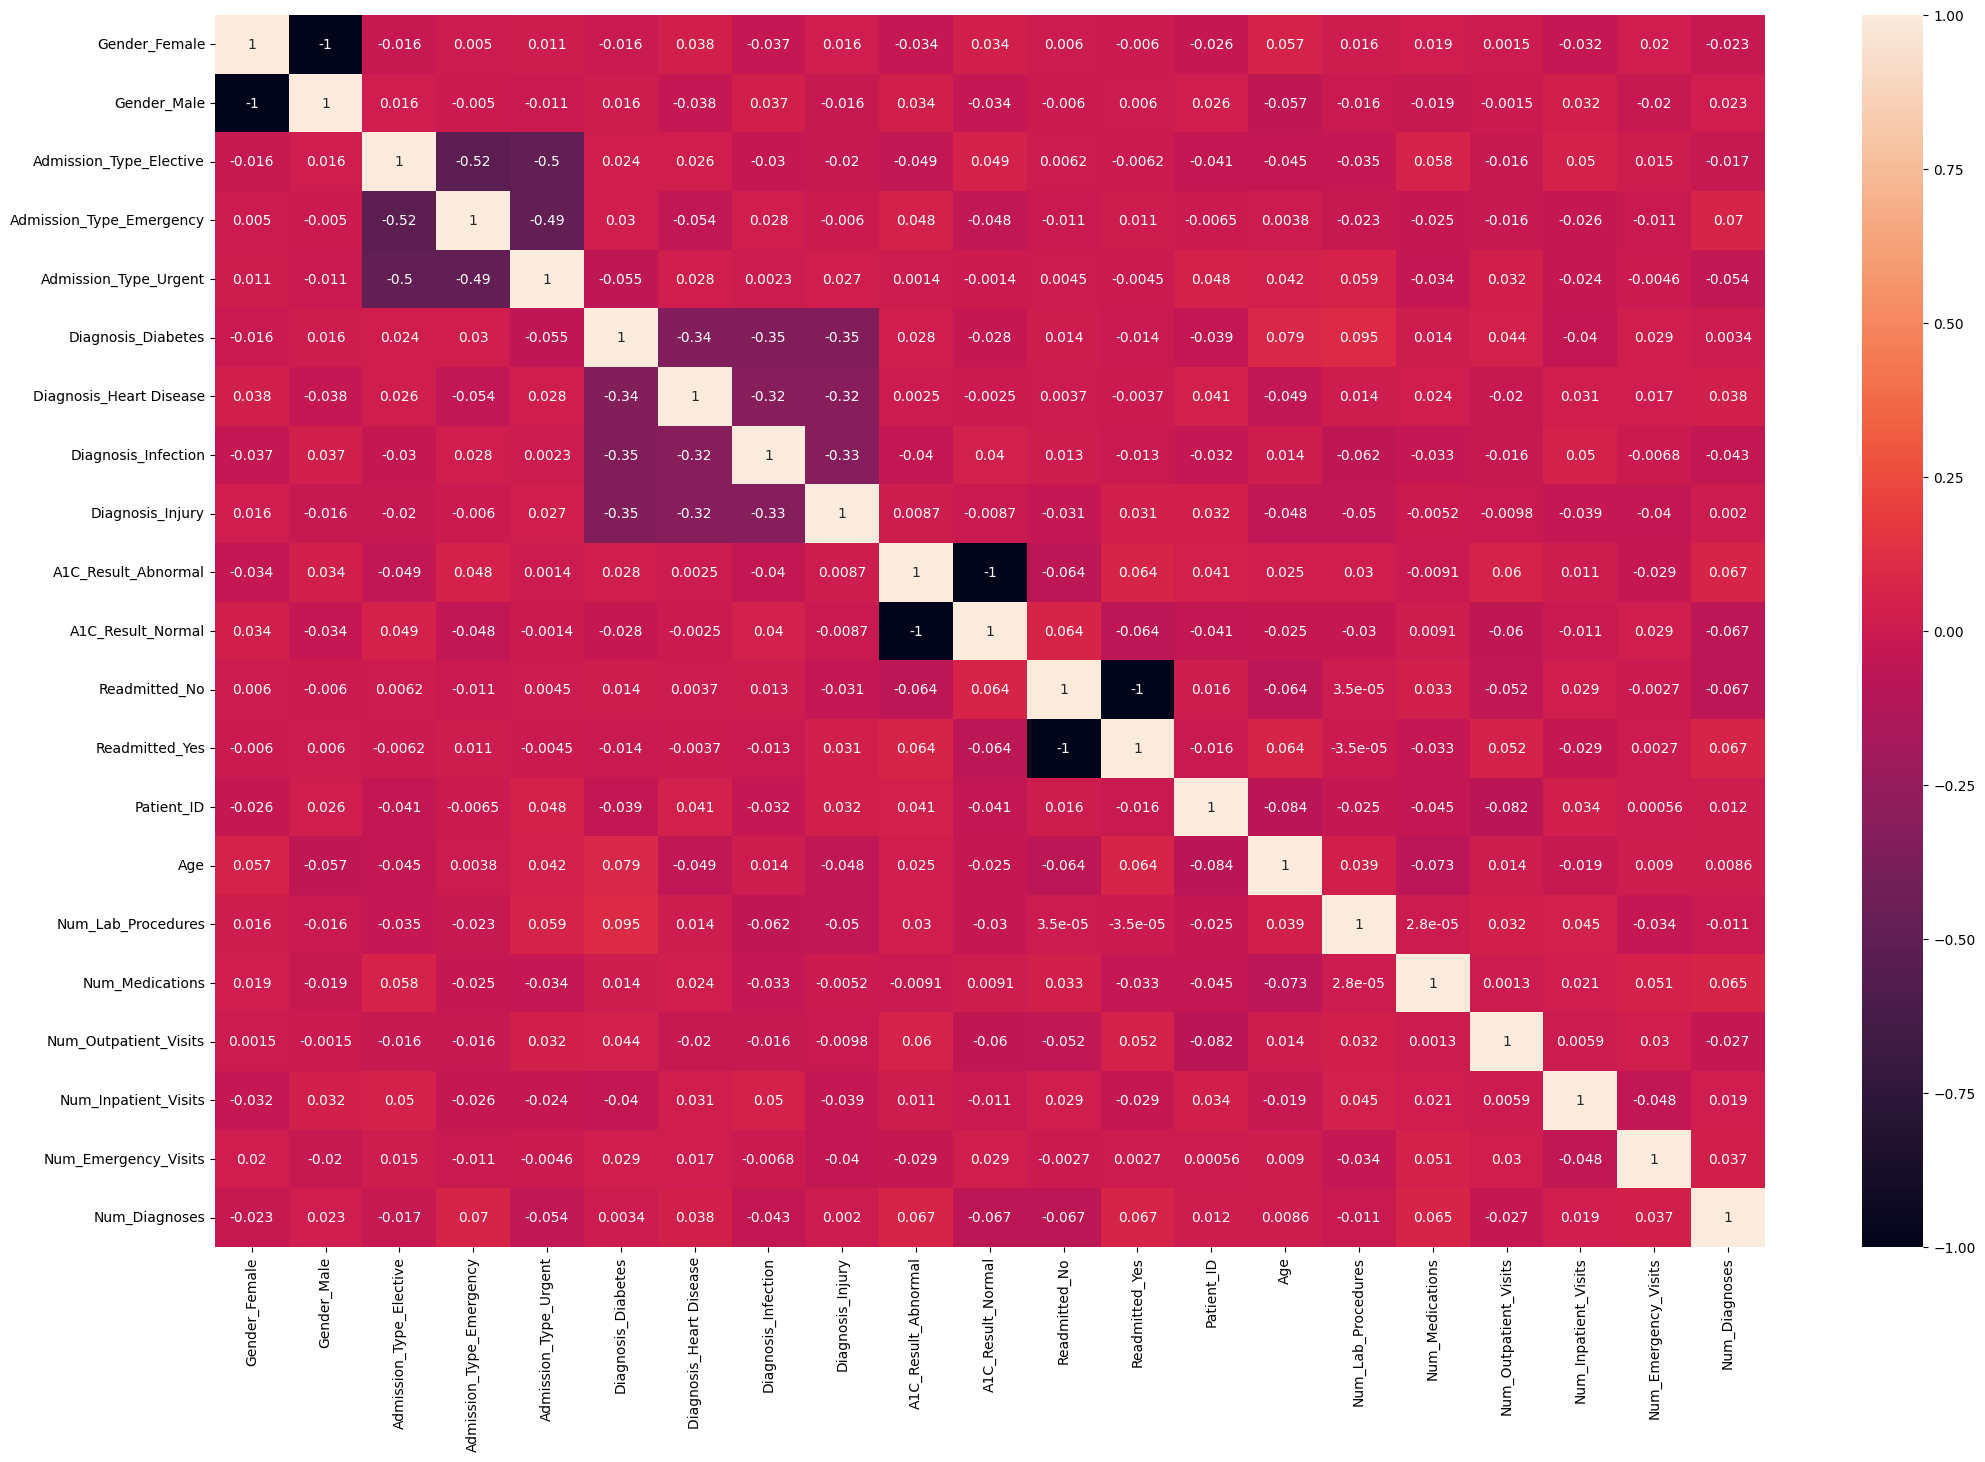

In [248]:
plt.figure(figsize=(25,16))
sns.heatmap(final_df.corr(),annot=True)
plt.show()

In [249]:
final_df.columns

Index(['Gender_Female', 'Gender_Male', 'Admission_Type_Elective',
       'Admission_Type_Emergency', 'Admission_Type_Urgent',
       'Diagnosis_Diabetes', 'Diagnosis_Heart Disease', 'Diagnosis_Infection',
       'Diagnosis_Injury', 'A1C_Result_Abnormal', 'A1C_Result_Normal',
       'Readmitted_No', 'Readmitted_Yes', 'Patient_ID', 'Age',
       'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits',
       'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses'],
      dtype='object')

In [250]:
X=final_df.drop(columns=['Readmitted_Yes','Readmitted_No'])
y=final_df['Readmitted_Yes']

In [251]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [252]:
y.value_counts()

Readmitted_Yes
False    503
True     497
Name: count, dtype: int64

In [253]:
y_resampled.value_counts()

Readmitted_Yes
True     503
False    503
Name: count, dtype: int64

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

[[88 76]
 [80 88]]
              precision    recall  f1-score   support

       False       0.52      0.54      0.53       164
        True       0.54      0.52      0.53       168

    accuracy                           0.53       332
   macro avg       0.53      0.53      0.53       332
weighted avg       0.53      0.53      0.53       332



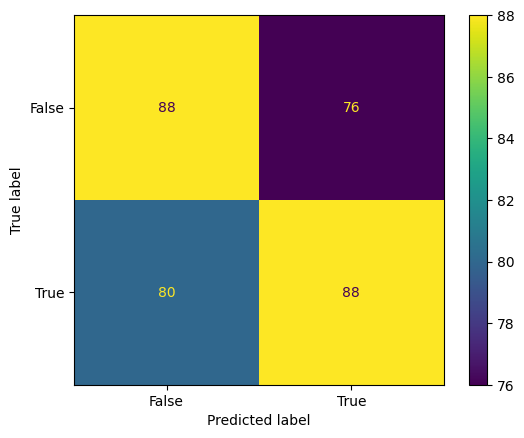

In [282]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[91 73]
 [89 79]]
--------------------------
              precision    recall  f1-score   support

       False       0.51      0.55      0.53       164
        True       0.52      0.47      0.49       168

    accuracy                           0.51       332
   macro avg       0.51      0.51      0.51       332
weighted avg       0.51      0.51      0.51       332

---------------------------


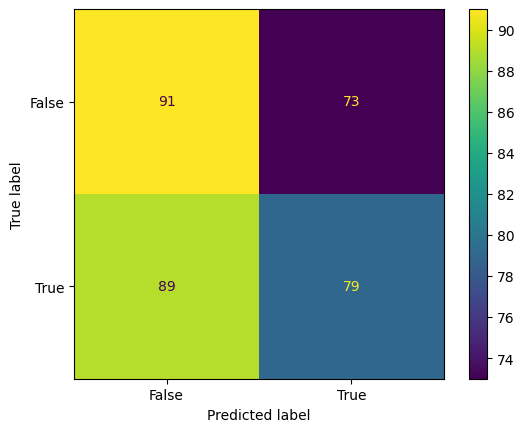

In [283]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [257]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


[[93 71]
 [93 75]]
--------------------------
              precision    recall  f1-score   support

       False       0.50      0.57      0.53       164
        True       0.51      0.45      0.48       168

    accuracy                           0.51       332
   macro avg       0.51      0.51      0.50       332
weighted avg       0.51      0.51      0.50       332

---------------------------


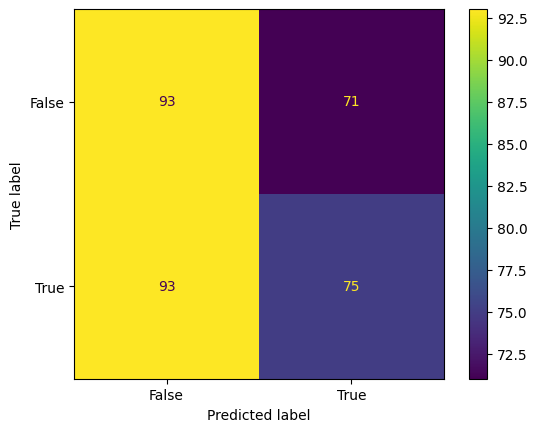

In [258]:
rfc=RandomForestClassifier(bootstrap= True, criterion='entropy', max_depth= None, max_features='log2', min_samples_leaf=4,min_samples_split= 2,n_estimators= 200)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [259]:
from xgboost import XGBClassifier


[[81 83]
 [81 87]]
--------------------------
              precision    recall  f1-score   support

       False       0.50      0.49      0.50       164
        True       0.51      0.52      0.51       168

    accuracy                           0.51       332
   macro avg       0.51      0.51      0.51       332
weighted avg       0.51      0.51      0.51       332

---------------------------


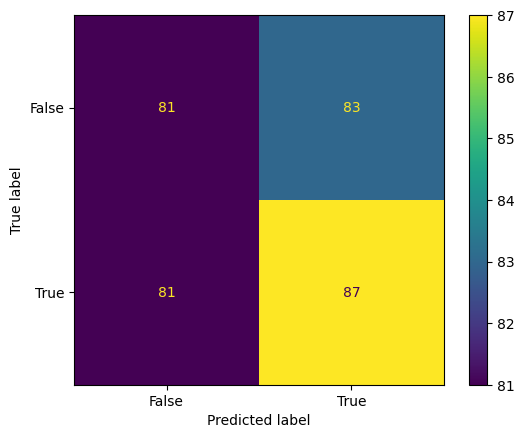

In [260]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

print(confusion_matrix(y_test,preds))
print('--------------------------')
print(classification_report(y_test,preds))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.show()

In [261]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.3],
    'gamma':[0,0.1,0.3],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0],
    'objective':['binary:logistic']
}

bst=XGBClassifier()

grid_search=GridSearchCV(estimator=bst,param_grid=param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)

print("best parameters:",grid_search.best_params_)

best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}


[[99 65]
 [95 73]]
--------------------------
              precision    recall  f1-score   support

       False       0.51      0.60      0.55       164
        True       0.53      0.43      0.48       168

    accuracy                           0.52       332
   macro avg       0.52      0.52      0.52       332
weighted avg       0.52      0.52      0.51       332

---------------------------


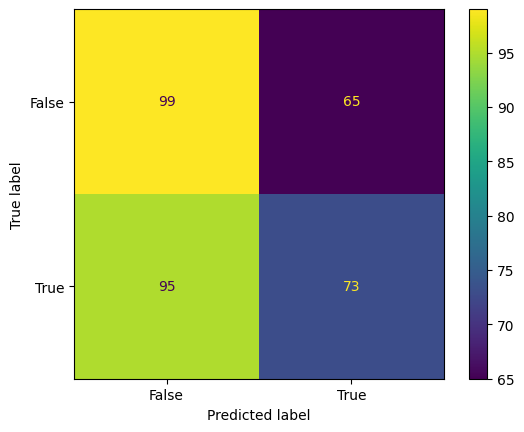

In [262]:
# create model instance
bst = XGBClassifier(colsample_bytree= 0.8, gamma= 0,learning_rate= 0.3, max_depth= 5, n_estimators= 200, objective= 'binary:logistic', subsample= 0.8)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds1 = bst.predict(X_test)

print(confusion_matrix(y_test,preds1))
print('--------------------------')
print(classification_report(y_test,preds1))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds1)
plt.show()

In [269]:
y_pred1=lr.predict(X_test)
y_pred2=rfc.predict(X_test)
y_pred3= bst.predict(X_test)


In [270]:
logistic=pd.DataFrame(y_pred1)
random=pd.DataFrame(y_pred2)
xgboost=pd.DataFrame(y_pred3)

In [271]:
final_pred = pd.concat([logistic, random, xgboost], axis = 1)

In [272]:
final_pred

,0,0,0
0,True,True,0
1,False,False,0
2,False,False,1
3,False,False,0
4,True,True,0
...,...,...,...
327,True,True,1
328,True,False,0
329,True,True,1
330,True,True,1


In [273]:
def g(series):
    return series.mode()

mode = final_pred.apply(g, axis=1)

In [274]:
mode = pd.DataFrame(mode)
mode.columns = ['mode']

In [275]:
final_df_pred = pd.concat([final_pred, mode], axis = 1)

In [276]:
final_df_pred

,0,0,0,mode
0,True,True,0,True
1,False,False,0,False
2,False,False,1,False
3,False,False,0,False
4,True,True,0,True
...,...,...,...,...
327,True,True,1,True
328,True,False,0,False
329,True,True,1,True
330,True,True,1,True


[[90 74]
 [95 73]]
              precision    recall  f1-score   support

       False       0.49      0.55      0.52       164
        True       0.50      0.43      0.46       168

    accuracy                           0.49       332
   macro avg       0.49      0.49      0.49       332
weighted avg       0.49      0.49      0.49       332



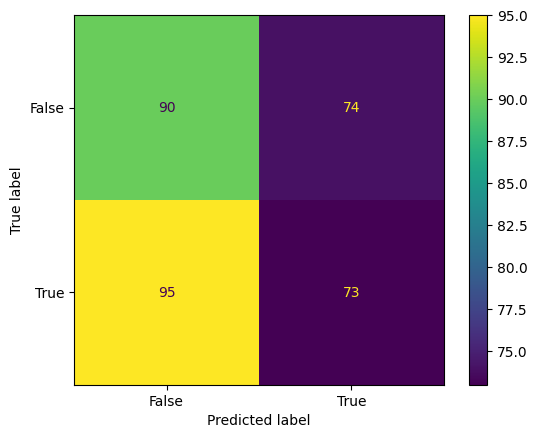

In [277]:
print(confusion_matrix(y_test, final_df_pred['mode']))
print('==============================')
print(classification_report(y_test, final_df_pred['mode']))
print('==============================')
ConfusionMatrixDisplay.from_predictions(y_test, final_df_pred['mode'])
plt.show()

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [266]:
import warnings
warnings.filterwarnings('ignore')

In [267]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'Admission_Type_Elective',
       'Admission_Type_Emergency', 'Admission_Type_Urgent',
       'Diagnosis_Diabetes', 'Diagnosis_Heart Disease', 'Diagnosis_Infection',
       'Diagnosis_Injury', 'A1C_Result_Abnormal', 'A1C_Result_Normal',
       'Patient_ID', 'Age', 'Num_Lab_Procedures', 'Num_Medications',
       'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits',
       'Num_Diagnoses'],
      dtype='object')

In [268]:
sfs1=SFS(RandomForestRegressor(),
         k_features=19,
         forward=True,
         floating=False,
         verbose=2,
         scoring='r2',
         cv=3)

sfs1=sfs1.fit(np.array(X_train),y_train)


[2024-05-05 12:16:13] Features: 1/19 -- score: -0.0063542678194756785
[2024-05-05 12:16:19] Features: 2/19 -- score: -0.0022605386572845942
[2024-05-05 12:16:25] Features: 3/19 -- score: -0.0022141379456972845
[2024-05-05 12:16:30] Features: 4/19 -- score: 0.0005611073310070788
[2024-05-05 12:16:35] Features: 5/19 -- score: -0.007625076730445064
[2024-05-05 12:16:40] Features: 6/19 -- score: -0.004571802341292138
[2024-05-05 12:16:46] Features: 7/19 -- score: -0.024132510085271657
[2024-05-05 12:16:51] Features: 8/19 -- score: -0.05482114680283442
[2024-05-05 12:16:55] Features: 9/19 -- score: -0.059405308709733706
[2024-05-05 12:17:00] Features: 10/19 -- score: -0.1315863072452846
[2024-05-05 12:17:05] Features: 11/19 -- score: -0.13278714914131848
[2024-05-05 12:17:14] Features: 12/19 -- score: -0.2076357269018688
[2024-05-05 12:17:23] Features: 13/19 -- score: -0.10246980270734903
[2024-05-05 12:17:32] Features: 14/19 -- score: -0.08130516469188682
[2024-05-05 12:17:39] Features: 1

In [210]:
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)

In [211]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['Gender_Female', 'Admission_Type_Elective', 'Admission_Type_Emergency',
       'Admission_Type_Urgent', 'Diagnosis_Diabetes',
       'Diagnosis_Heart Disease', 'Diagnosis_Infection', 'Diagnosis_Injury',
       'A1C_Result_Abnormal', 'Patient_ID', 'Age', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses'],
      dtype='object')

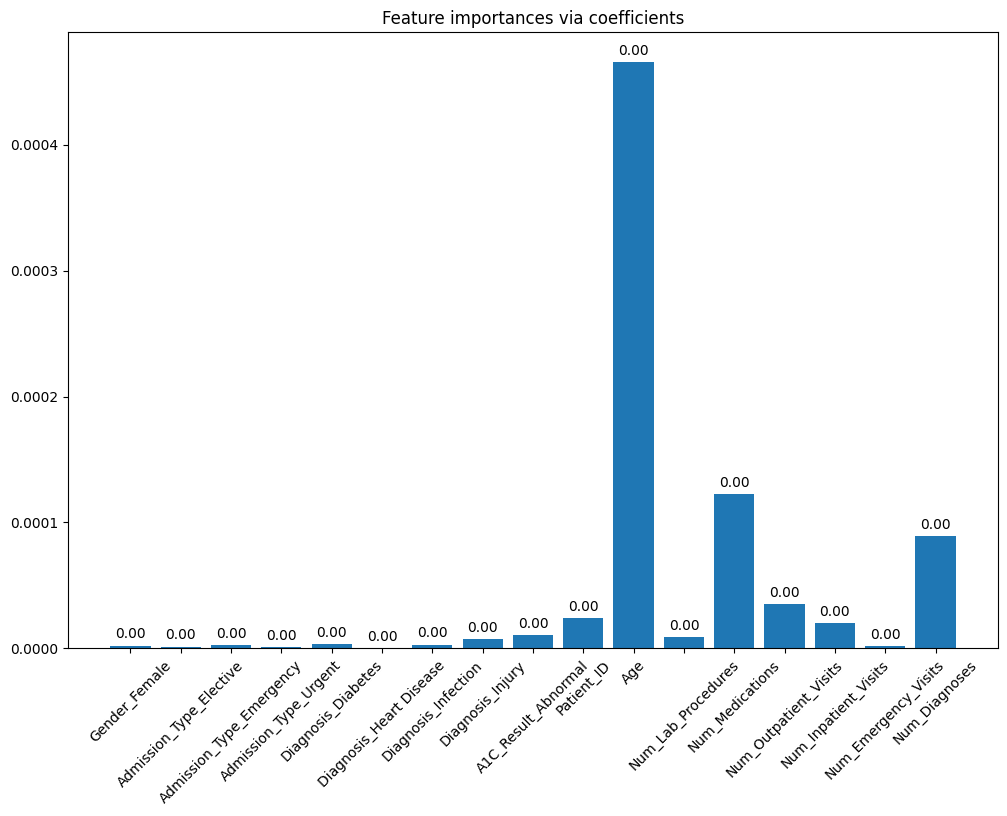

In [212]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8
bars = plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotations for each bar
for bar, importance_value in zip(bars, importance):
    plt.annotate(f"{importance_value:.2f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


In [213]:
from time import time


In [214]:
from sklearn.feature_selection import SequentialFeatureSelector
tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=4, direction="backward"
).fit(X, y)
toc_bwd = time()
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")


Features selected by backward sequential selection: ['A1C_Result_Abnormal' 'Age' 'Num_Outpatient_Visits' 'Num_Diagnoses']
Done in 1.967s


In [215]:
selected_columns = ['A1C_Result_Abnormal','Age','Num_Outpatient_Visits','Num_Diagnoses']

df1 = final_df[selected_columns].copy()


In [216]:
df1.shape

(1000, 4)

In [217]:
y.shape

(1000,)

In [218]:
y.value_counts()

Readmitted_Yes
False    503
True     497
Name: count, dtype: int64

In [219]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.33, random_state=42)

[[100  65]
 [ 83  82]]
              precision    recall  f1-score   support

       False       0.55      0.61      0.57       165
        True       0.56      0.50      0.53       165

    accuracy                           0.55       330
   macro avg       0.55      0.55      0.55       330
weighted avg       0.55      0.55      0.55       330



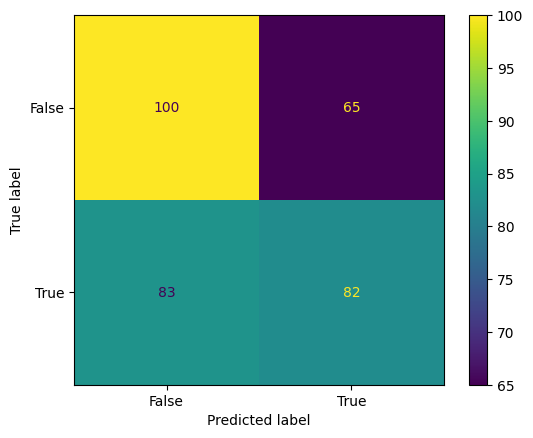

In [220]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[79 86]
 [78 87]]
--------------------------
              precision    recall  f1-score   support

       False       0.50      0.48      0.49       165
        True       0.50      0.53      0.51       165

    accuracy                           0.50       330
   macro avg       0.50      0.50      0.50       330
weighted avg       0.50      0.50      0.50       330

---------------------------


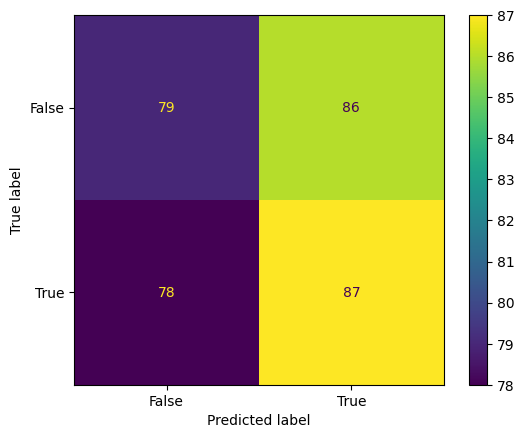

In [221]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [222]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=4, direction="forward"
).fit(X, y)
toc_fwd = time()
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['A1C_Result_Abnormal' 'Age' 'Num_Outpatient_Visits' 'Num_Diagnoses']
Done in 0.582s


In [ ]:
'A1C_Result_Abnormal' 'Age' 'Num_Outpatient_Visits' 'Num_Diagnoses'`
['A1C_Result_Abnormal' 'Age' 'Num_Outpatient_Visits' 'Num_Diagnoses']

[[90 75]
 [99 66]]
--------------------------
              precision    recall  f1-score   support

       False       0.48      0.55      0.51       165
        True       0.47      0.40      0.43       165

    accuracy                           0.47       330
   macro avg       0.47      0.47      0.47       330
weighted avg       0.47      0.47      0.47       330

---------------------------


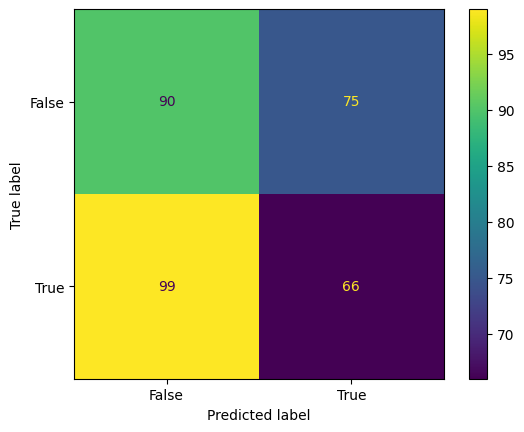

In [224]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

print(confusion_matrix(y_test,preds))
print('--------------------------')
print(classification_report(y_test,preds))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.show()